In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart.csv to heart.csv
User uploaded file "heart.csv" with length 11328 bytes


In [34]:
import pandas as pd
import numpy as np
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


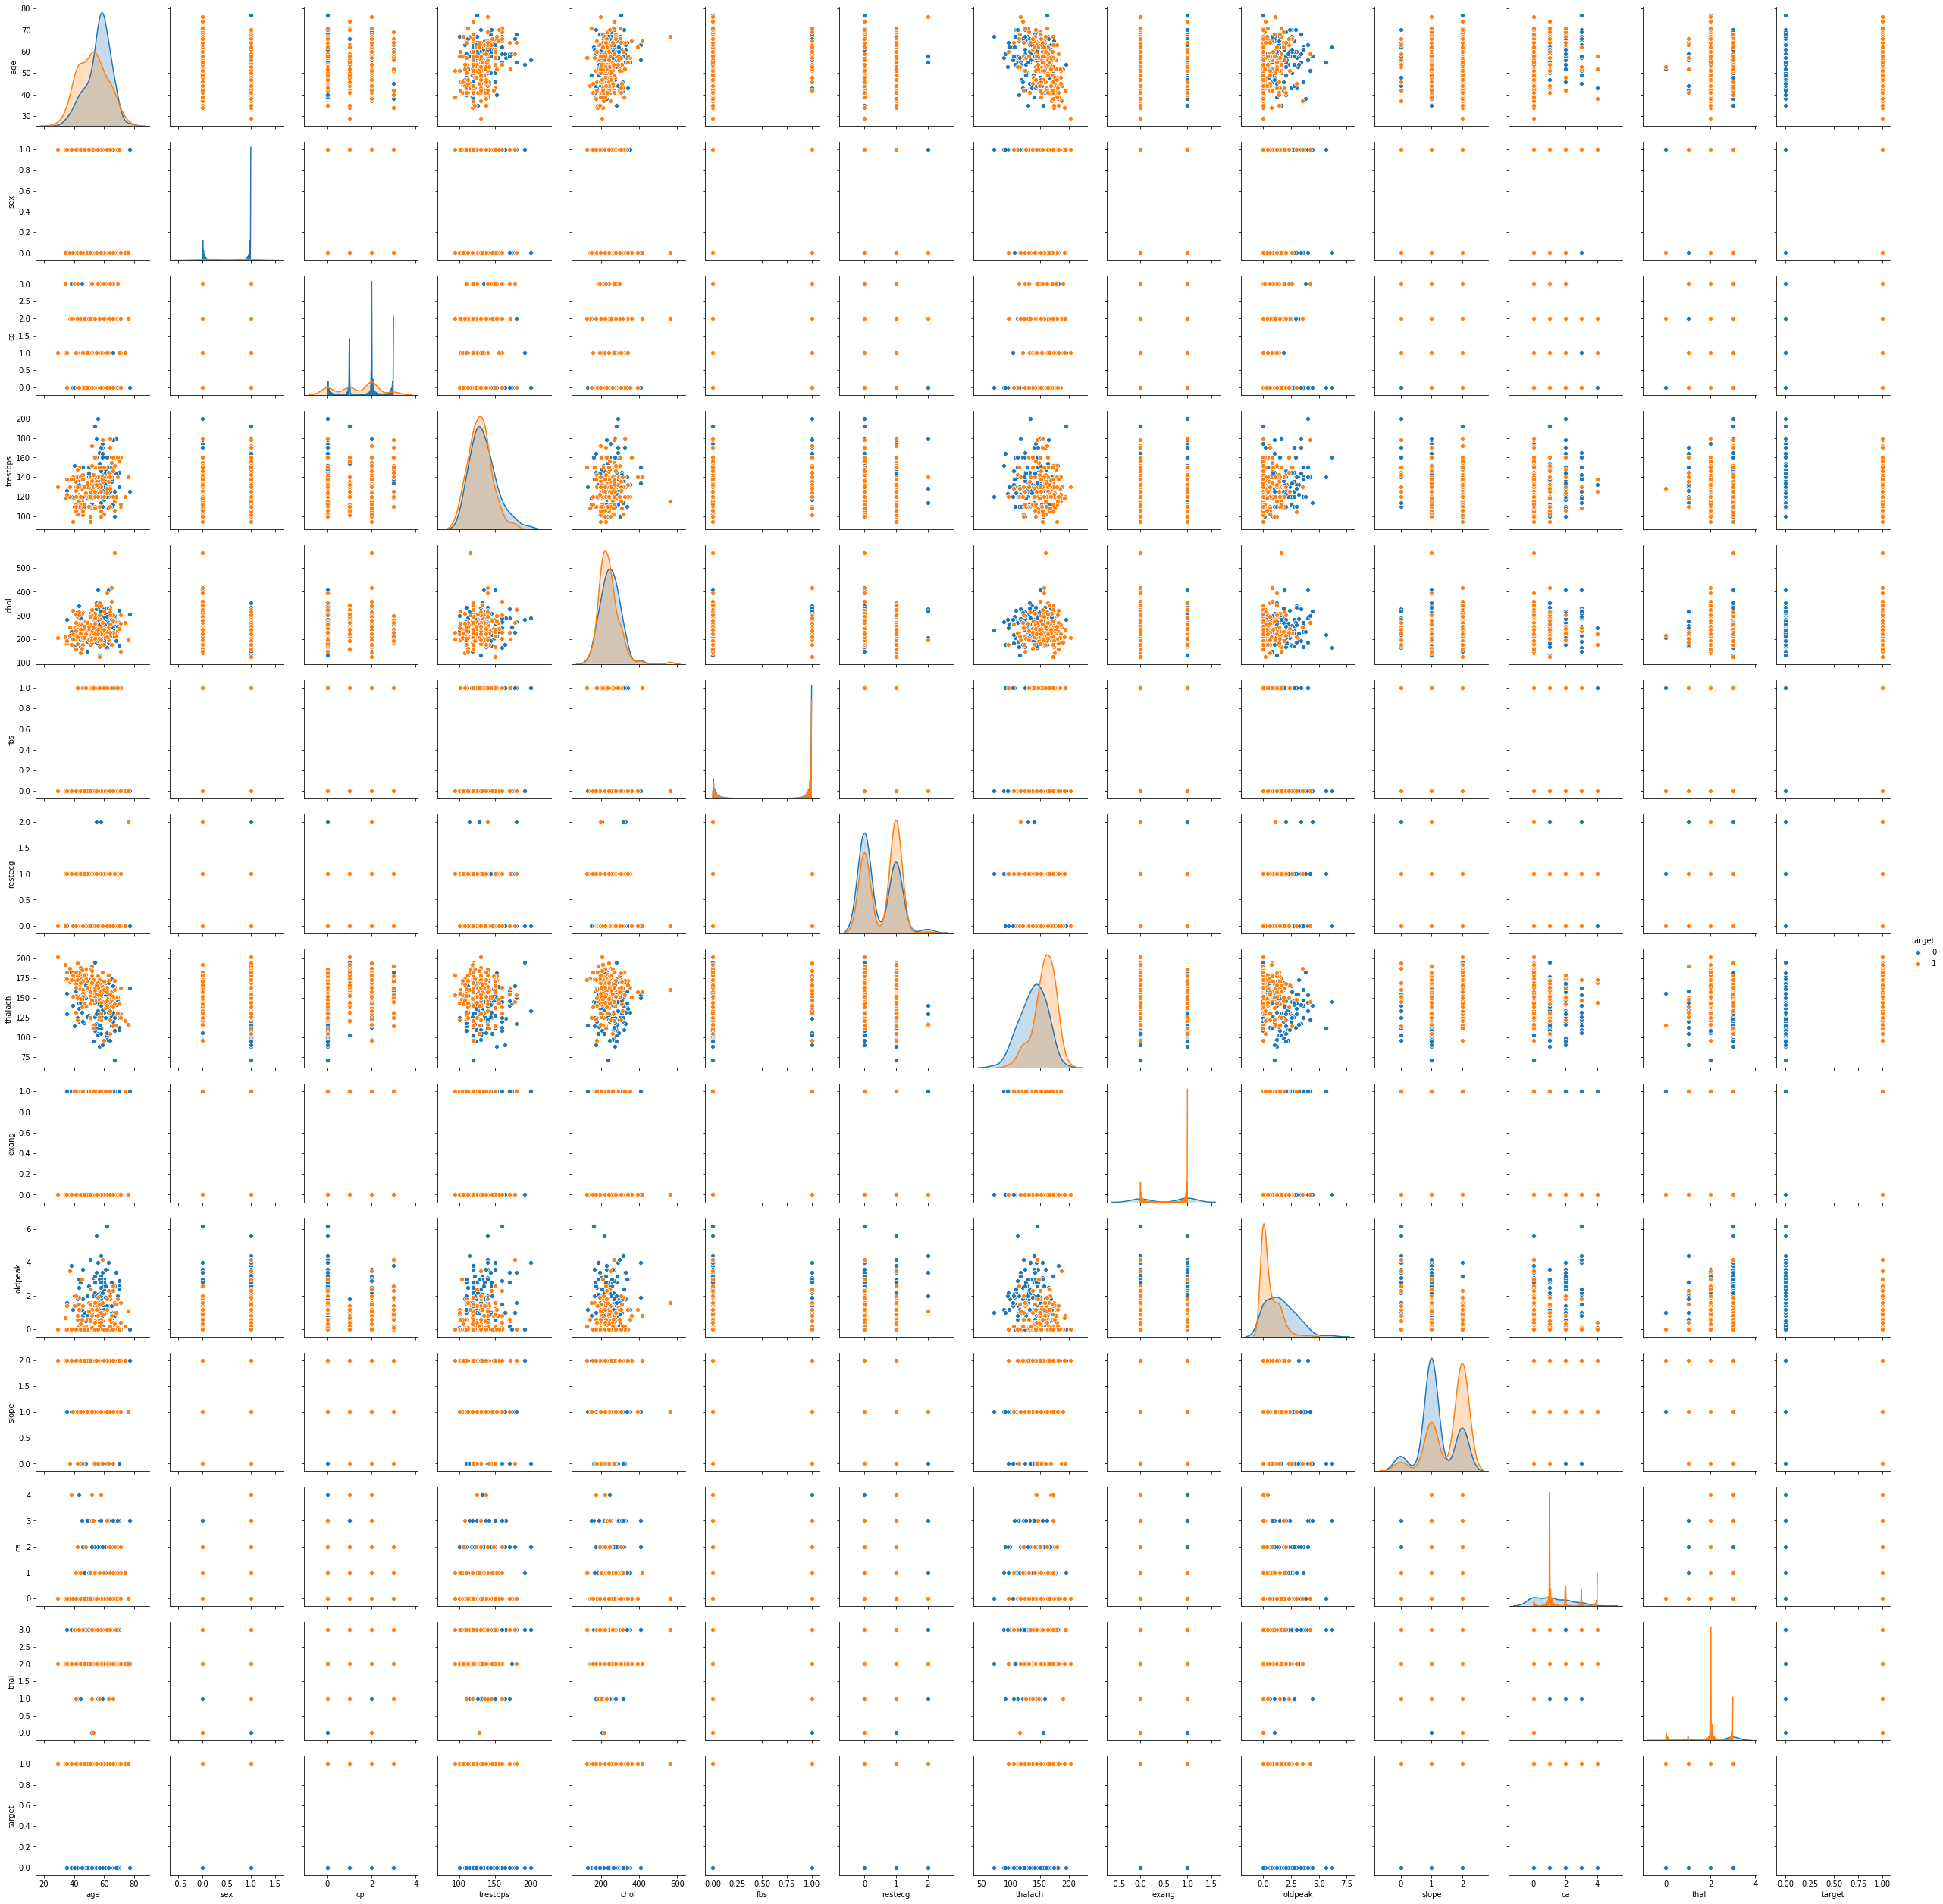

In [13]:
sns.pairplot(df, hue='target')

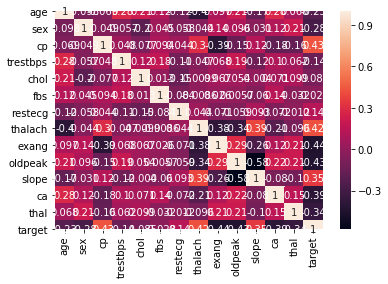

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
# creating input features and target variables
x = df.iloc[:, 0:13]
y = df.iloc[:, 13]
x.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [18]:
# standard scaler from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [0]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [0]:
# time for neural network
from keras import Sequential
from keras.layers import Dense

In [0]:
clf = Sequential()
# first hidden layer
clf.add(Dense(5, activation='relu', kernel_initializer='random_normal', input_dim=13))
# second hidden layer
clf.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
# output layer
clf.add(Dense(1,activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
# compiling neural network
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# fitting the data
clf.fit(x_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
212/212 [==============================] - 0s 161us/step - loss: 0.2938 - acc: 0.8632
Epoch 2/500
212/212 [==============================] - 0s 120us/step - loss: 0.2929 - acc: 0.8726
Epoch 3/500
212/212 [==============================] - 0s 160us/step - loss: 0.2930 - acc: 0.8679
Epoch 4/500
212/212 [==============================] - 0s 118us/step - loss: 0.2913 - acc: 0.8726
Epoch 5/500
212/212 [==============================] - 0s 130us/step - loss: 0.2908 - acc: 0.8726
Epoch 6/500
212/212 [==============================] - 0s 106us/step - loss: 0.2902 - acc: 0.8726
Epoch 7/500
212/212 [==============================] - 0s 160us/step - loss: 0.2900 - acc: 0.8726
Epoch 8/500
212/212 [==============================] - 0s 114us/step - loss: 0.2893 - acc: 0.8726
Epoch 9/500
212/212 [==============================] - 0s 120us/step - loss: 0.2882 - acc: 0.8726
Epoch 10/500
212/212 [==============================] - 0s 131us/step - loss: 0.2875 - acc: 0.8726
Epoch 11/500
212/21

In [25]:
eval_model = clf.evaluate(x_train, y_train)
eval_model

212/212 [==============================] - 0s 245us/step


[0.09830815548885544, 0.9716981132075472]

In [0]:
# predicting the values now
y_pred = clf.predict(x_test)

In [0]:
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred[i] = int(1)
  else:
    y_pred[i] = int(0)

In [0]:
y_pred = np.array(y_pred, dtype=int)

In [0]:
# accuracy
from sklearn.metrics import accuracy_score

In [39]:
print('The final accuracy score of this neural network is:',accuracy_score(y_pred, y_test))

The final accuracy score of this neural network is: 0.8351648351648352
